<a href="https://colab.research.google.com/github/cmcin019/mini-cours/blob/jour-2/Intoduction_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bienvenue

Bienvenue à la deuxième session de programmation en python! Cette session est conçue pour vous aider à comprendre les bases d'OpenCV. Nous commencerons par les fonctions fondamentales - imread, imwrite, imshow, resize, cvtColor, etc - et passerons progressivement à des concepts plus complexes. En cours de route, vous aurez l'occasion d'appliquer ce que vous avez appris à travers des exercices.

# OpenCV

OpenCV (Open Source Computer Vision Library) est une librairie populaire utilisée pour les tâches de vision artificielle et de traitement d'images. Elle est largement utilisée dans des applications telles que la reconnaissance faciale, la détection d'objets, le suivi de mouvements, etc.

Pour commencer, nous allons importer quelques bibliothèques importantes qui nous aideront tout au long du processus.

In [7]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg \
    -O noidea.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# These imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations
from urllib.request import urlopen

#the following are to do with this interactive notebook code
%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the noteboo

--2024-04-30 07:54:46--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70503 (69K) [image/jpeg]
Saving to: ‘noidea.jpg’

noidea.jpg          100%[===================>]  68.85K  --.-KB/s    in 0.008s  

2024-04-30 07:54:46 (8.46 MB/s) - ‘noidea.jpg’ saved [70503/70503]

--2024-04-30 07:54:46--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

Nous pouvons maintenant ouvrir une image :


In [9]:
input_image=cv2.imread('noidea.jpg')

Nous pouvons découvrir plusieurs choses sur cette image

In [12]:
print(f"Size: {input_image.size}")
print(f"Shape: {input_image.shape}")
print(f"Type: {input_image.dtype}")

Size: 776250
Shape: (414, 625, 3)
Type: uint8


Et nous pouvons visualiser l'image:

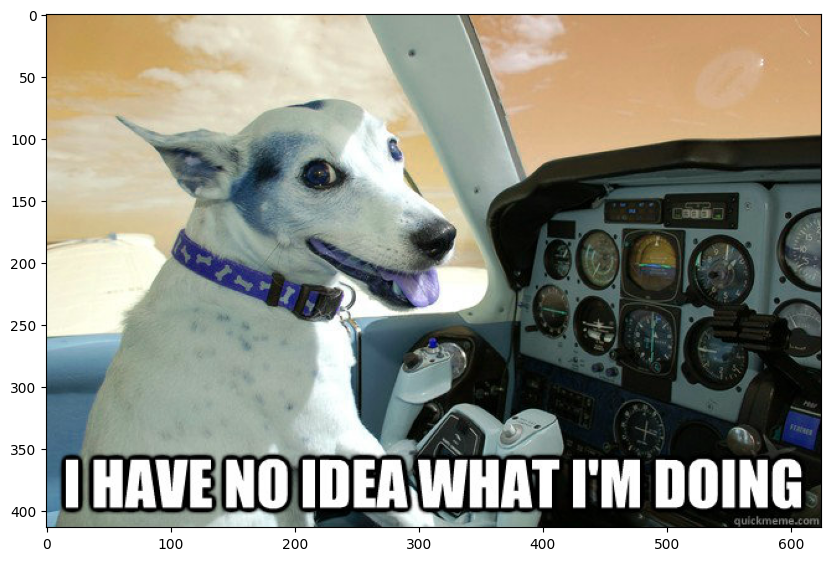

In [13]:
plt.imshow(input_image)

Cela illustre une caractéristique essentielle d'OpenCV : il ne stocke pas les images au format RGB, mais au format BGR.

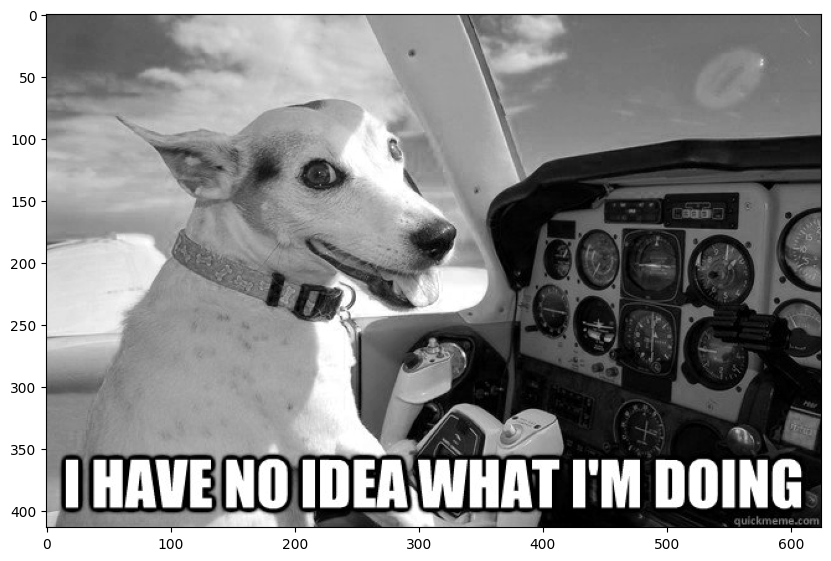

In [14]:
# split channels
b,g,r=cv2.split(input_image)
# show one of the channels (this is red - see that the sky is kind of dark. try changing it to b)
plt.imshow(r, cmap='gray')

Nous pouvons facilement convertir les différents espaces colorimétriques dans OpenCV. Nous avons vu comment diviser, ci-dessus. Nous pouvons également fusionner des canaux :

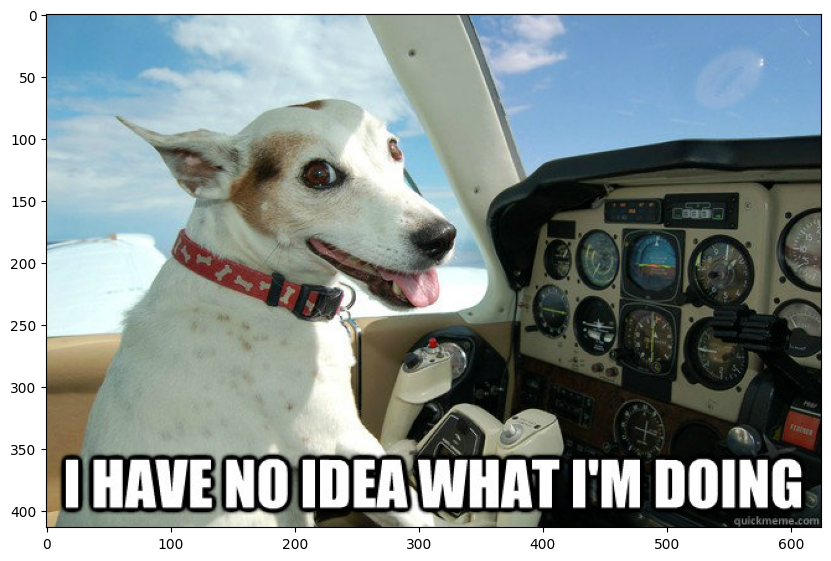

In [15]:
merged=cv2.merge([r,g,b])
# merge takes an array of single channel matrices
plt.imshow(merged)

OpenCV dispose également d'une fonction spécifique pour traiter les espaces colorimétriques des images. Plutôt que de diviser et de fusionner les canaux à la main, vous pouvez donc utiliser cette fonction.

Il y a quelque chose comme 250 drapeaux liés à la couleur dans OpenCV pour la conversion et l'affichage. Les plus utilisés sont COLOR_BGR2RGB pour la conversion RGB, COLOR_BGR2GRAY pour la conversion en niveaux de gris, et COLOR_BGR2HSV pour la conversion en espace de couleur Hue,Saturation,Value.

In [16]:
COLORflags = [flag for flag in dir(cv2) if flag.startswith('COLOR') ]
print(len(COLORflags))


368


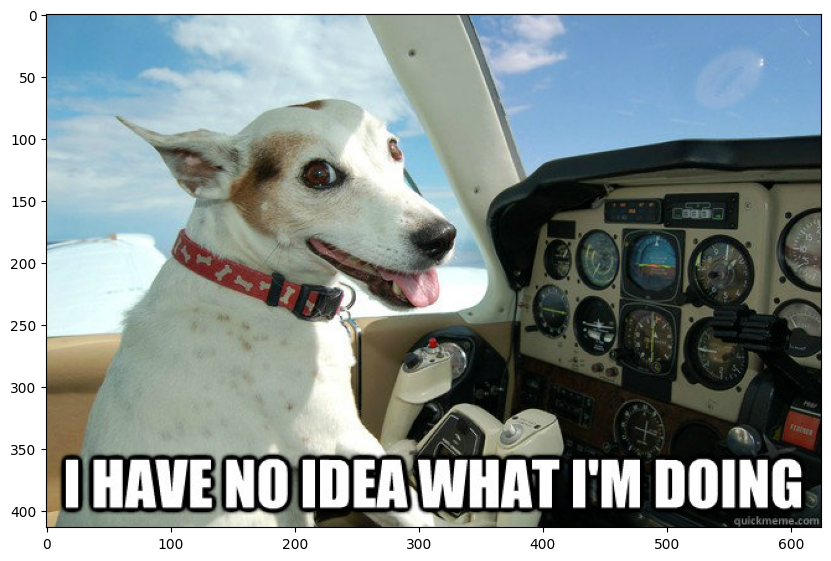

In [17]:
opencv_merged=cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(opencv_merged)

Les images en python OpenCV sont des tableaux numpy. Les tableaux Numpy sont optimisés pour des opérations rapides sur les tableaux et il existe donc généralement des méthodes rapides pour effectuer des calculs sur les tableaux qui n'impliquent pas d'écrire tous les détails soi-même. C'est donc généralement une mauvaise pratique que d'accéder à des pixels individuels, mais vous pouvez le faire.

In [18]:
pixel = input_image[100,100]
print(pixel)

[150 161 153]


In [19]:
input_image[100,100] = [0,0,0]
pixelnew = input_image[100,100]
print(pixelnew)

[0 0 0]


De la même manière que nous pouvons obtenir ou définir des pixels individuels, nous pouvons obtenir ou définir des régions d'une image. Il s'agit d'un moyen particulièrement utile pour obtenir une région d'intérêt sur laquelle travailler.

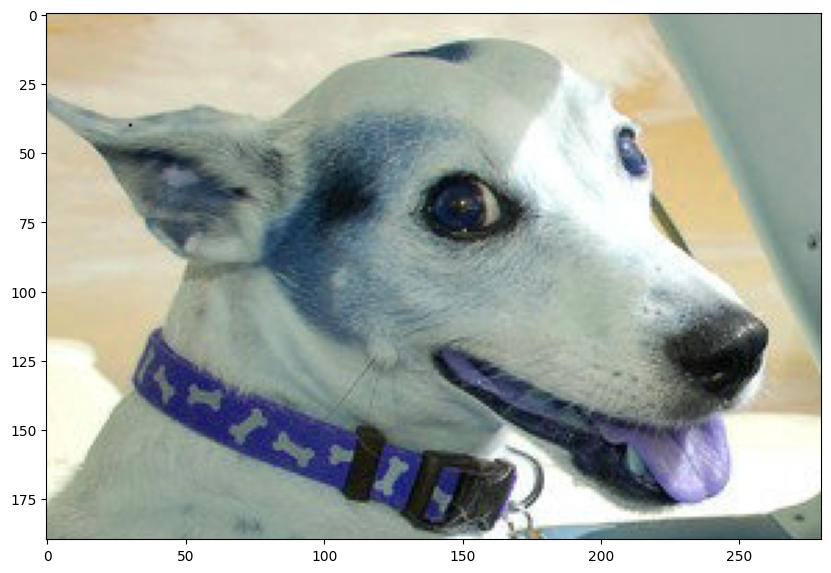

In [20]:
dogface = input_image[60:250, 70:350]
plt.imshow(dogface)

190
280


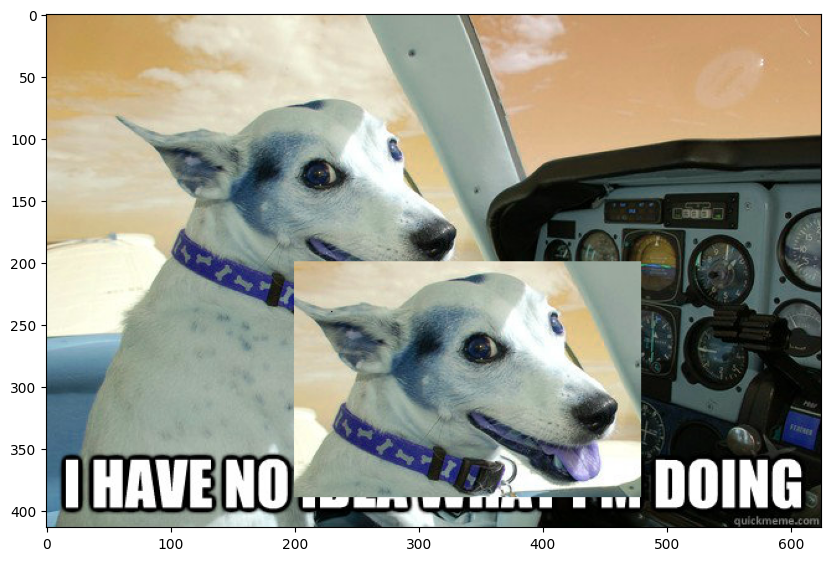

In [21]:
fresh_image=cv2.imread('noidea.jpg')

fresh_image[200:200+dogface.shape[0], 200:200+dogface.shape[1]]=dogface
print(dogface.shape[0])
print(dogface.shape[1])
plt.imshow(fresh_image)

Nous pouvons également explorer les bases de la manipulation d'images

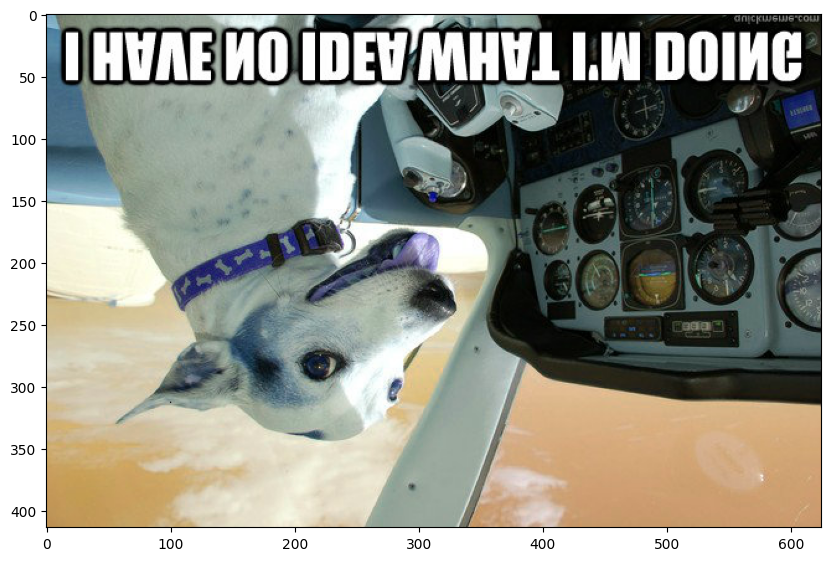

In [22]:
flipped_code_0=cv2.flip(input_image,0) # vertical flip
plt.imshow(flipped_code_0)

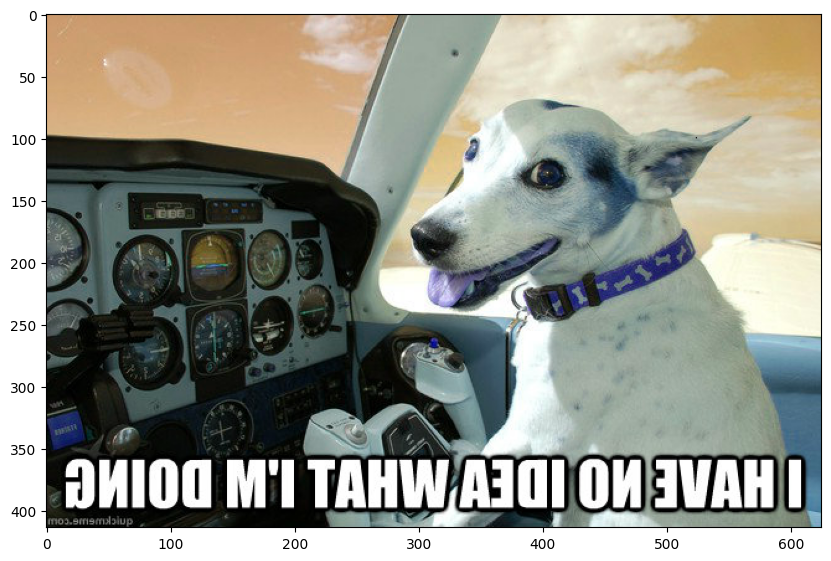

In [23]:
flipped_code_1=cv2.flip(input_image,1) # horizontal flip
plt.imshow(flipped_code_1)

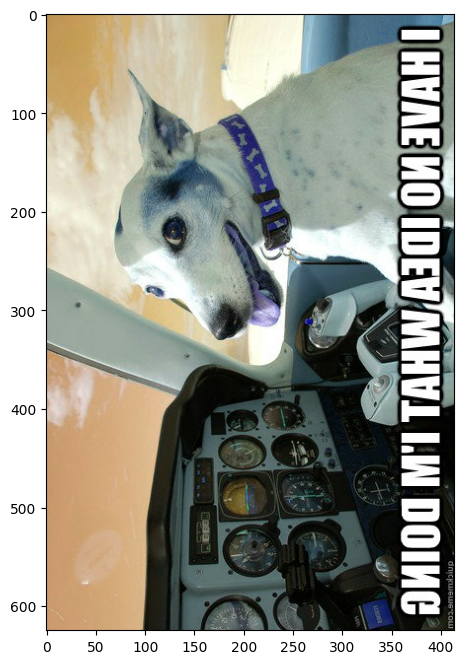

In [24]:
transposed=cv2.transpose(input_image)
plt.imshow(transposed)

OpenCV dispose de nombreuses fonctions pour effectuer des calculs mathématiques sur des images.
Les opérations arithmétiques utiles comprennent l'addition et l'addition pondérée, qui combinent deux images de même taille.

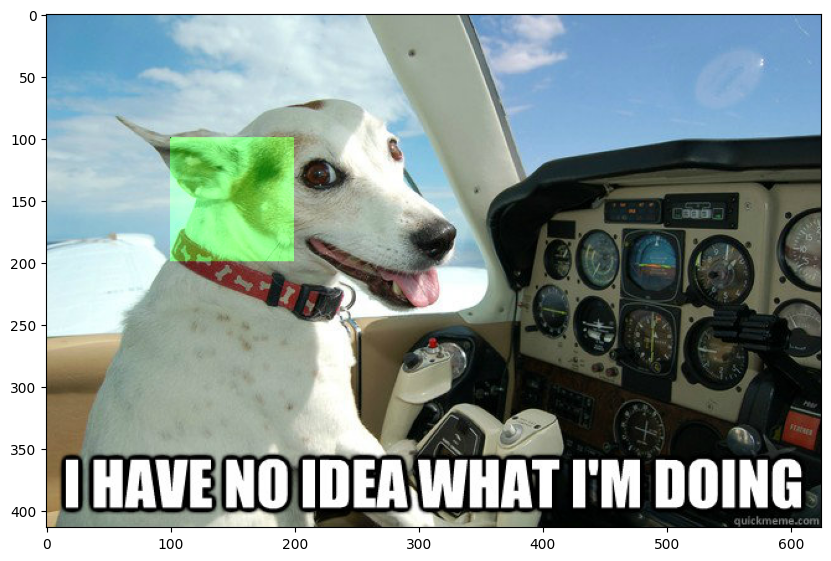

In [26]:
#First create an image the same size as our input
blank_image = np.zeros((input_image.shape), np.uint8)

blank_image[100:200,100:200,1]=100; #give it a green square

new_image=cv2.add(blank_image,input_image) # add the two images together

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

La réduction du bruit consiste généralement à flouter une image à l'aide d'un noyau gaussien. La largeur du noyau détermine le degré de lissage.

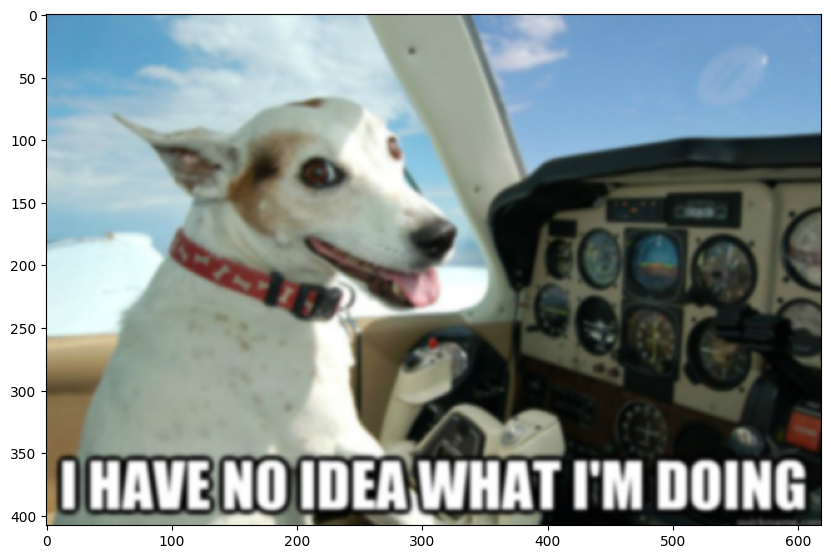

In [27]:
d=3
img_blur3 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur3, cv2.COLOR_BGR2RGB))

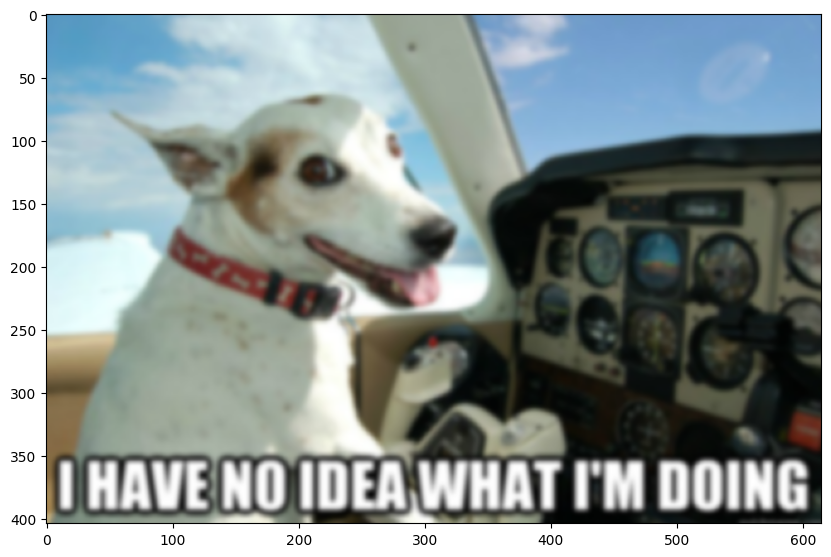

In [28]:
d=5
img_blur5 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur5, cv2.COLOR_BGR2RGB))

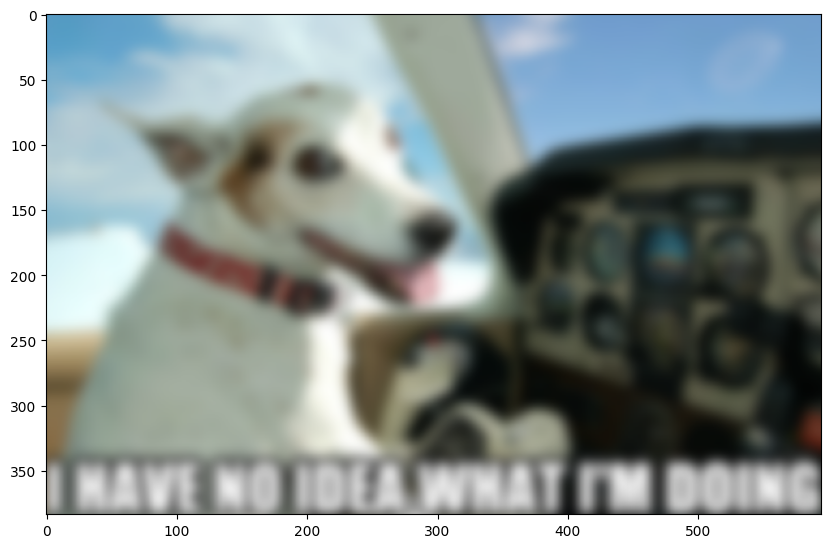

In [29]:
d=15
img_blur15 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur15, cv2.COLOR_BGR2RGB))

Il est également possible d'accentuer la netteté d'une image à l'aide d'un noyau d'accentuation.

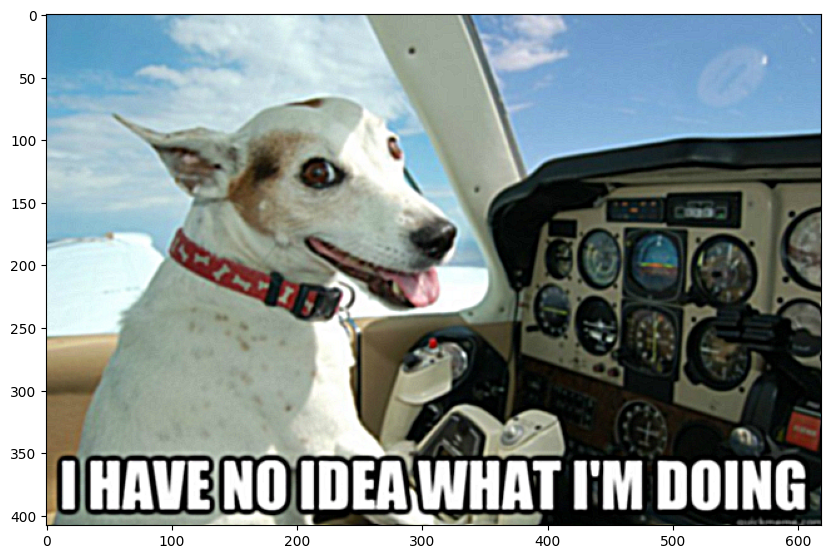

In [35]:
# Define the sharpening kernel. The values might need to be adjusted depending on the image.
sharpening_kernel = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
])

sharpened_image = cv2.filter2D(img_blur3, -1, sharpening_kernel)

plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))

Opencv permet également de dessiner du texte et des formes sur des images.

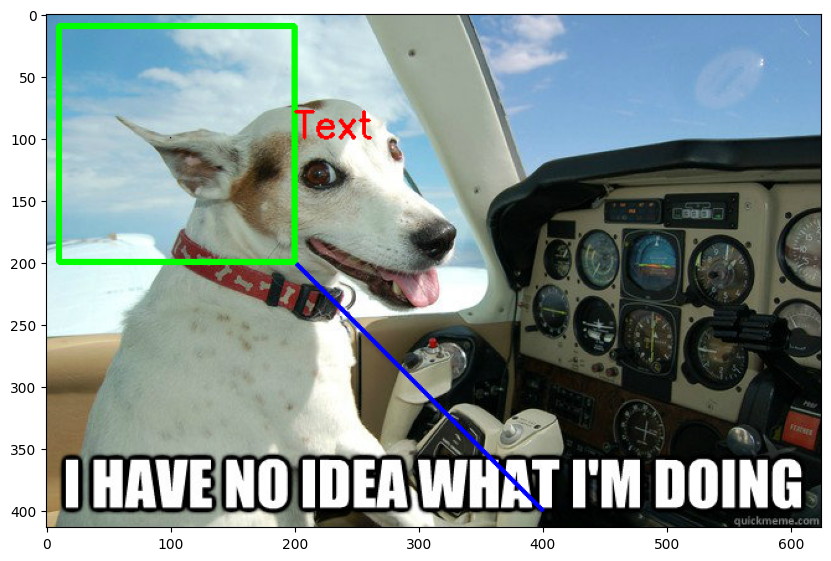

In [31]:
img_draw = cv2.line(input_image, (200, 200), (400, 400), (255, 0, 0), thickness=2)  # Draw a blue line
img_draw = cv2.rectangle(input_image, (10, 10), (200, 200), (0, 255, 0), thickness=3)  # Draw a green rectangle
img_draw = cv2.putText(input_image, 'Text', (200, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)  # Draw red text

plt.imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))

## Exercices

**Exercice 1.** Redimensionner une image à la moitié de sa largeur et de sa hauteur d'origine.

**Exercice 2.** Convert an image from BGR to Grayscale and HSV color systems.

**Exercice 3.** Crop the central part of the image and then rotate it by 90 degrees clockwise

**Exercice 4.** Apply a Gaussian blur to an image and then sharpen the same image.

**Exercice 5.** Change the color of a specific area in the image to red.

## Aller plus loin

Un lien vers la page de documentation d'opencv: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

Un tutoriel sur youtube: https://www.youtube.com/watch?v=oXlwWbU8l2o

## À noter

Ce carnet est inspiré et s'inspire du référentiel suivant
https://colab.research.google.com/github/computationalcore/introduction-to-opencv/blob/master/notebooks/1-Fundamentals.ipynb#scrollTo=-jEyTpSTebff